# KNN

參考資料:https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#diabetes.csv  →Pima Indians Daibetes Database
        

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


data = pd.read_csv(r'diabetes.csv') #資料集
#print(data.shape)
#print(data.columns)
#print(data.groupby('Outcome').size())

X = data.iloc[:, 0:8]  #八個特徵欄的資料
Y = data.iloc[:, 8]    #結果欄資料

models = []  #準備放置多個候選模型
models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) #一般
models.append(("KNN-W", KNeighborsClassifier(n_neighbors=3, weights="distance"))) #距離越遠權重越低


#把原始資料分成訓練與測試(80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
print('Training Test')
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))
print('')

Training Test
name: KNN; score: 0.7077922077922078
name: KNN-W; score: 0.7142857142857143



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Cross Validation
name: KNN; cross val score: 0.7056049213943951
name: KNN-W; cross val score: 0.7017088174982912


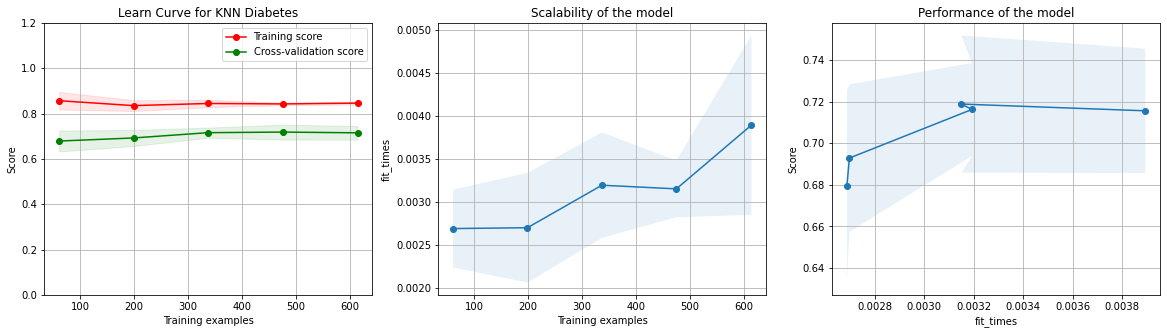

In [23]:
#多做幾次測試來驗證模型的準確性
#交叉驗證評估
results = []
for name, model in models:
    kfold = KFold(n_splits=10) # K折交叉驗證器，將資料折成10份(9份訓練, 1份測試)
    cv_result = cross_val_score(model, X, Y, cv=kfold) #交叉驗證評估分數
    results.append((name, cv_result))
print('Cross Validation')
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(results[i][0],results[i][1].mean()))
    
    
#繪製學習曲線圖
from sklearn.model_selection import ShuffleSplit
# from plot_learning_curve import plot_learning_curve

knn = models[0][1]   #KNeighborsClassifier(n_neighbors=3)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plt_learn = plot_learning_curve(knn, "Learn Curve for KNN Diabetes",
                    X, Y, ylim=(0., 1.2), cv=cv)


[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 [ 89.   28.1]
 [137.   43.1]]
name: KNN; cross val score: 0.7355434039644566
name: KNN-W; cross val score: 0.718626110731374


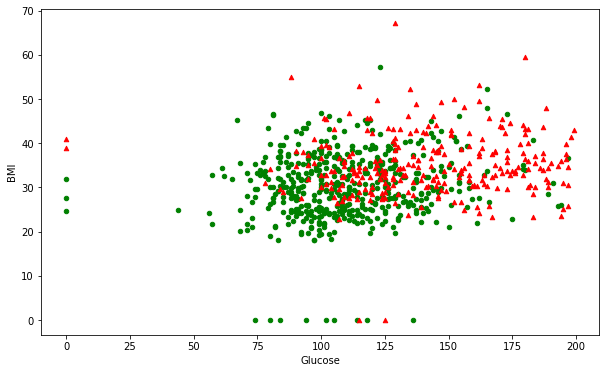

In [19]:
#挑出兩個最佳特徵
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
print(X_new[0:5]) #列出出五筆

#最相佳特徵分別為 Glucose（血糖濃度）和 BMI指數
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))

#繪製最佳特徵資料散布圖
plt.figure(figsize=(10, 6))
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y==0][:, 0], X_new[Y==0][:, 1], c='g', s=20, marker='o');  #陰性
plt.scatter(X_new[Y==1][:, 0], X_new[Y==1][:, 1], c='r', s=20, marker='^');  #陽性

plt.show()   



#結論 :可看出紅色的是有生病的，血糖濃度或BMI越高，越有可能生病